In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Red ratio by different policies - Random source nodes.

In [2]:
# Different policies.
policies = ['Node2vec', 'ResourceAllocation', 'PreferencialAttachment', 'JaccardCoefficient', 'Gain', 'ExpGain', 
           'AdamicAdar', 'Random']

In [3]:
# Load red ratio per epoch for each policy.
redRatio = dict()
for policy in policies:    
    redRatio[policy] = np.loadtxt('redRatioBy%sRandomSources.txt' %policy)

<IPython.core.display.Javascript object>


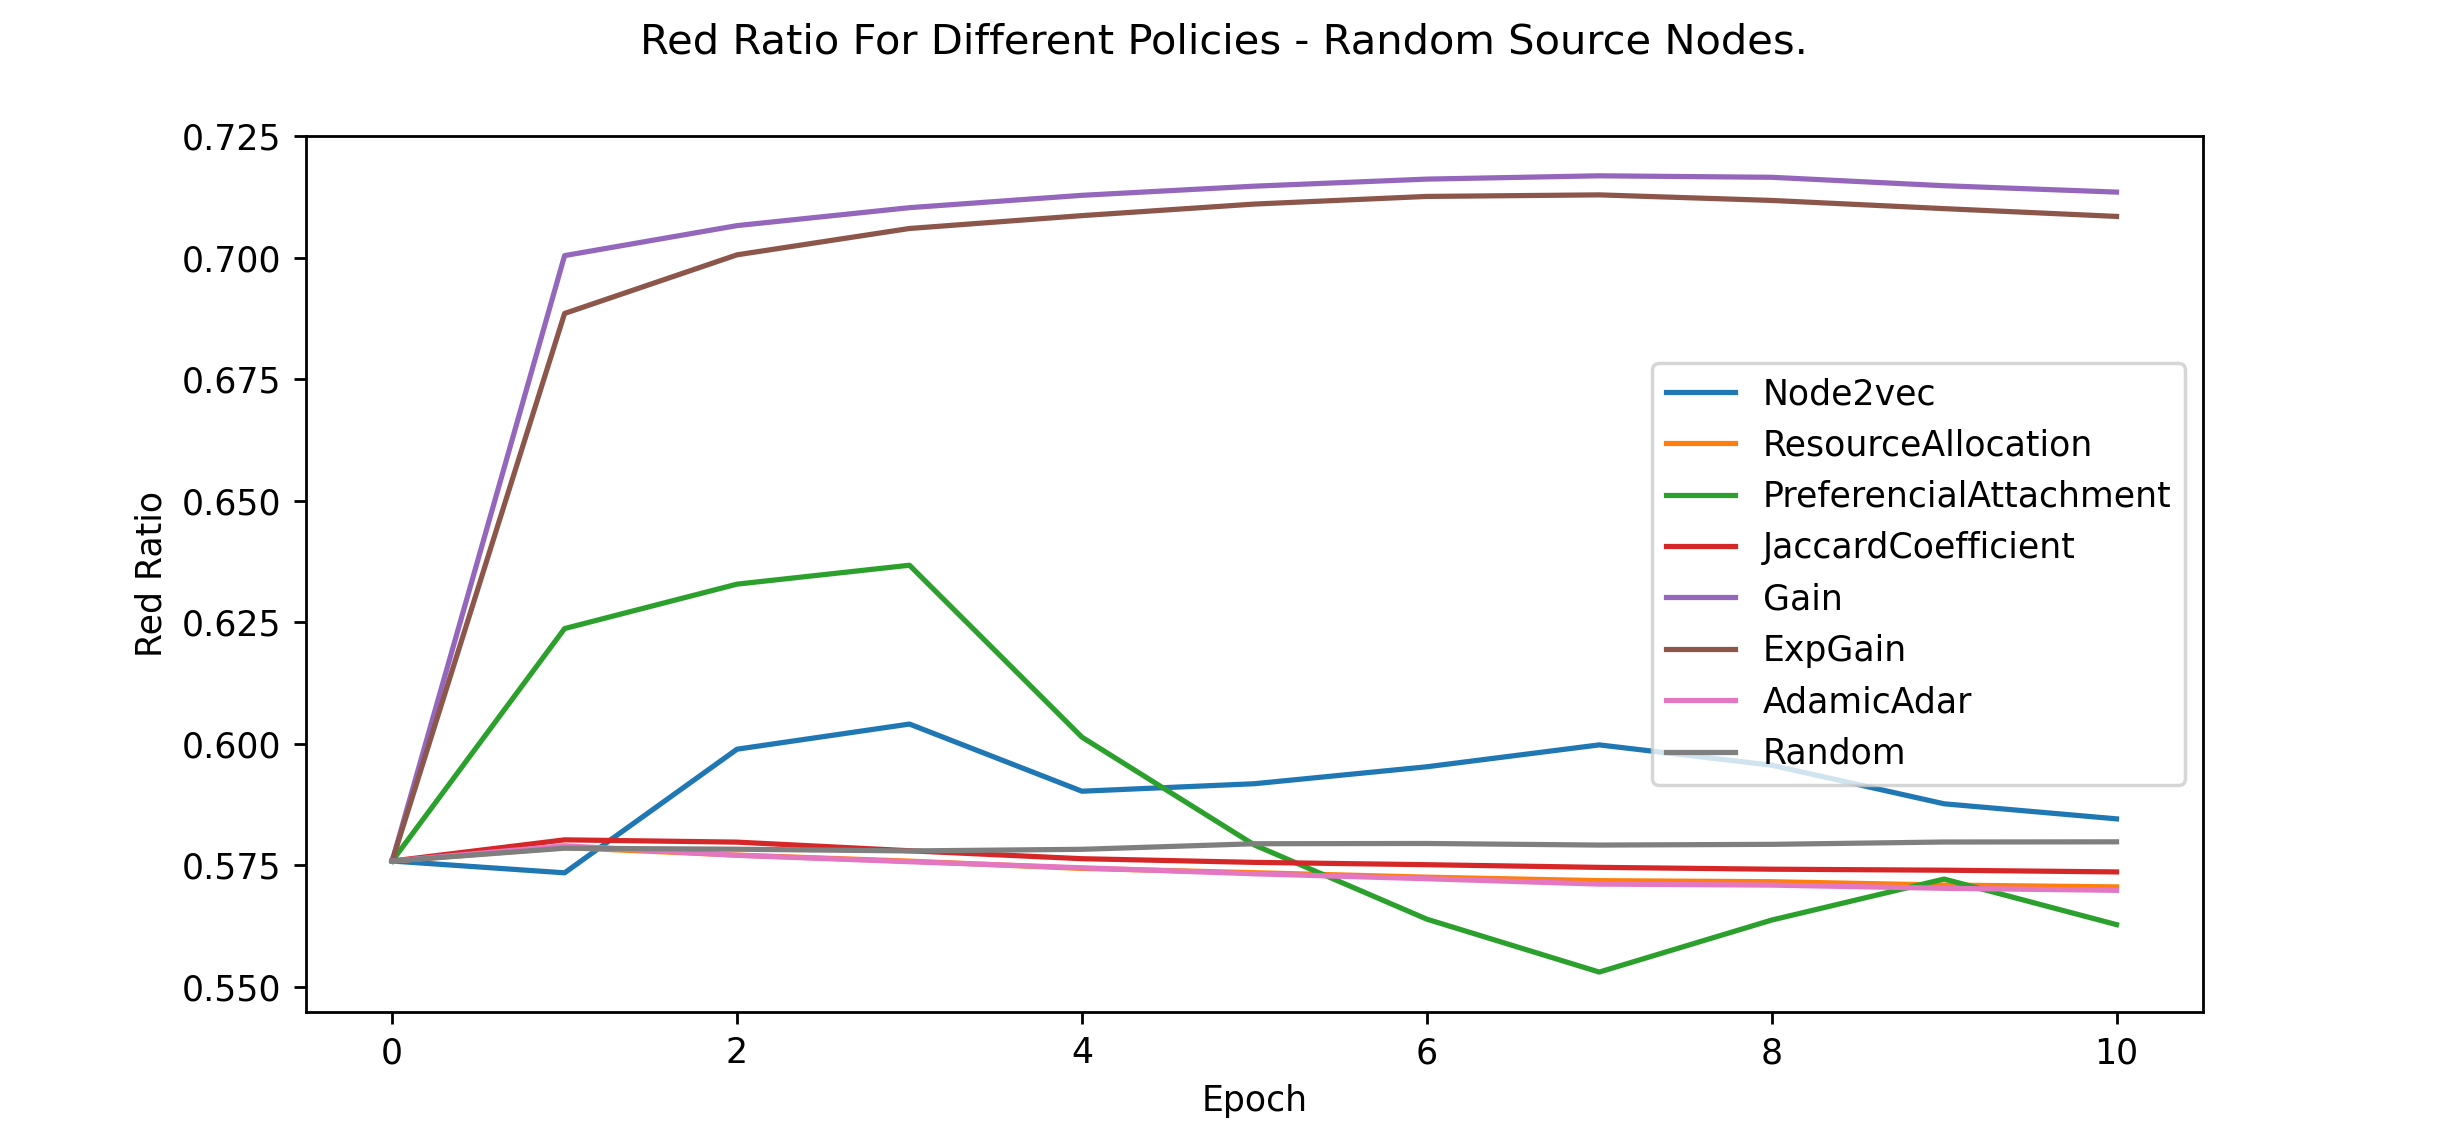

In [4]:
fig = plt.figure()
fig.suptitle('Red Ratio For Different Policies - Random Source Nodes.')
plt.xlabel('Epoch')
plt.ylabel('Red Ratio')
xAxis = np.arange(len(redRatio['Node2vec']) )
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Red ratio by different policies - Best red source nodes.

In [5]:
# Load red ratio per epoch for each policy.
redRatio = dict()
for policy in policies:    
    redRatio[policy] = np.loadtxt('redRatioBy%sRedSources.txt' %policy)

<IPython.core.display.Javascript object>


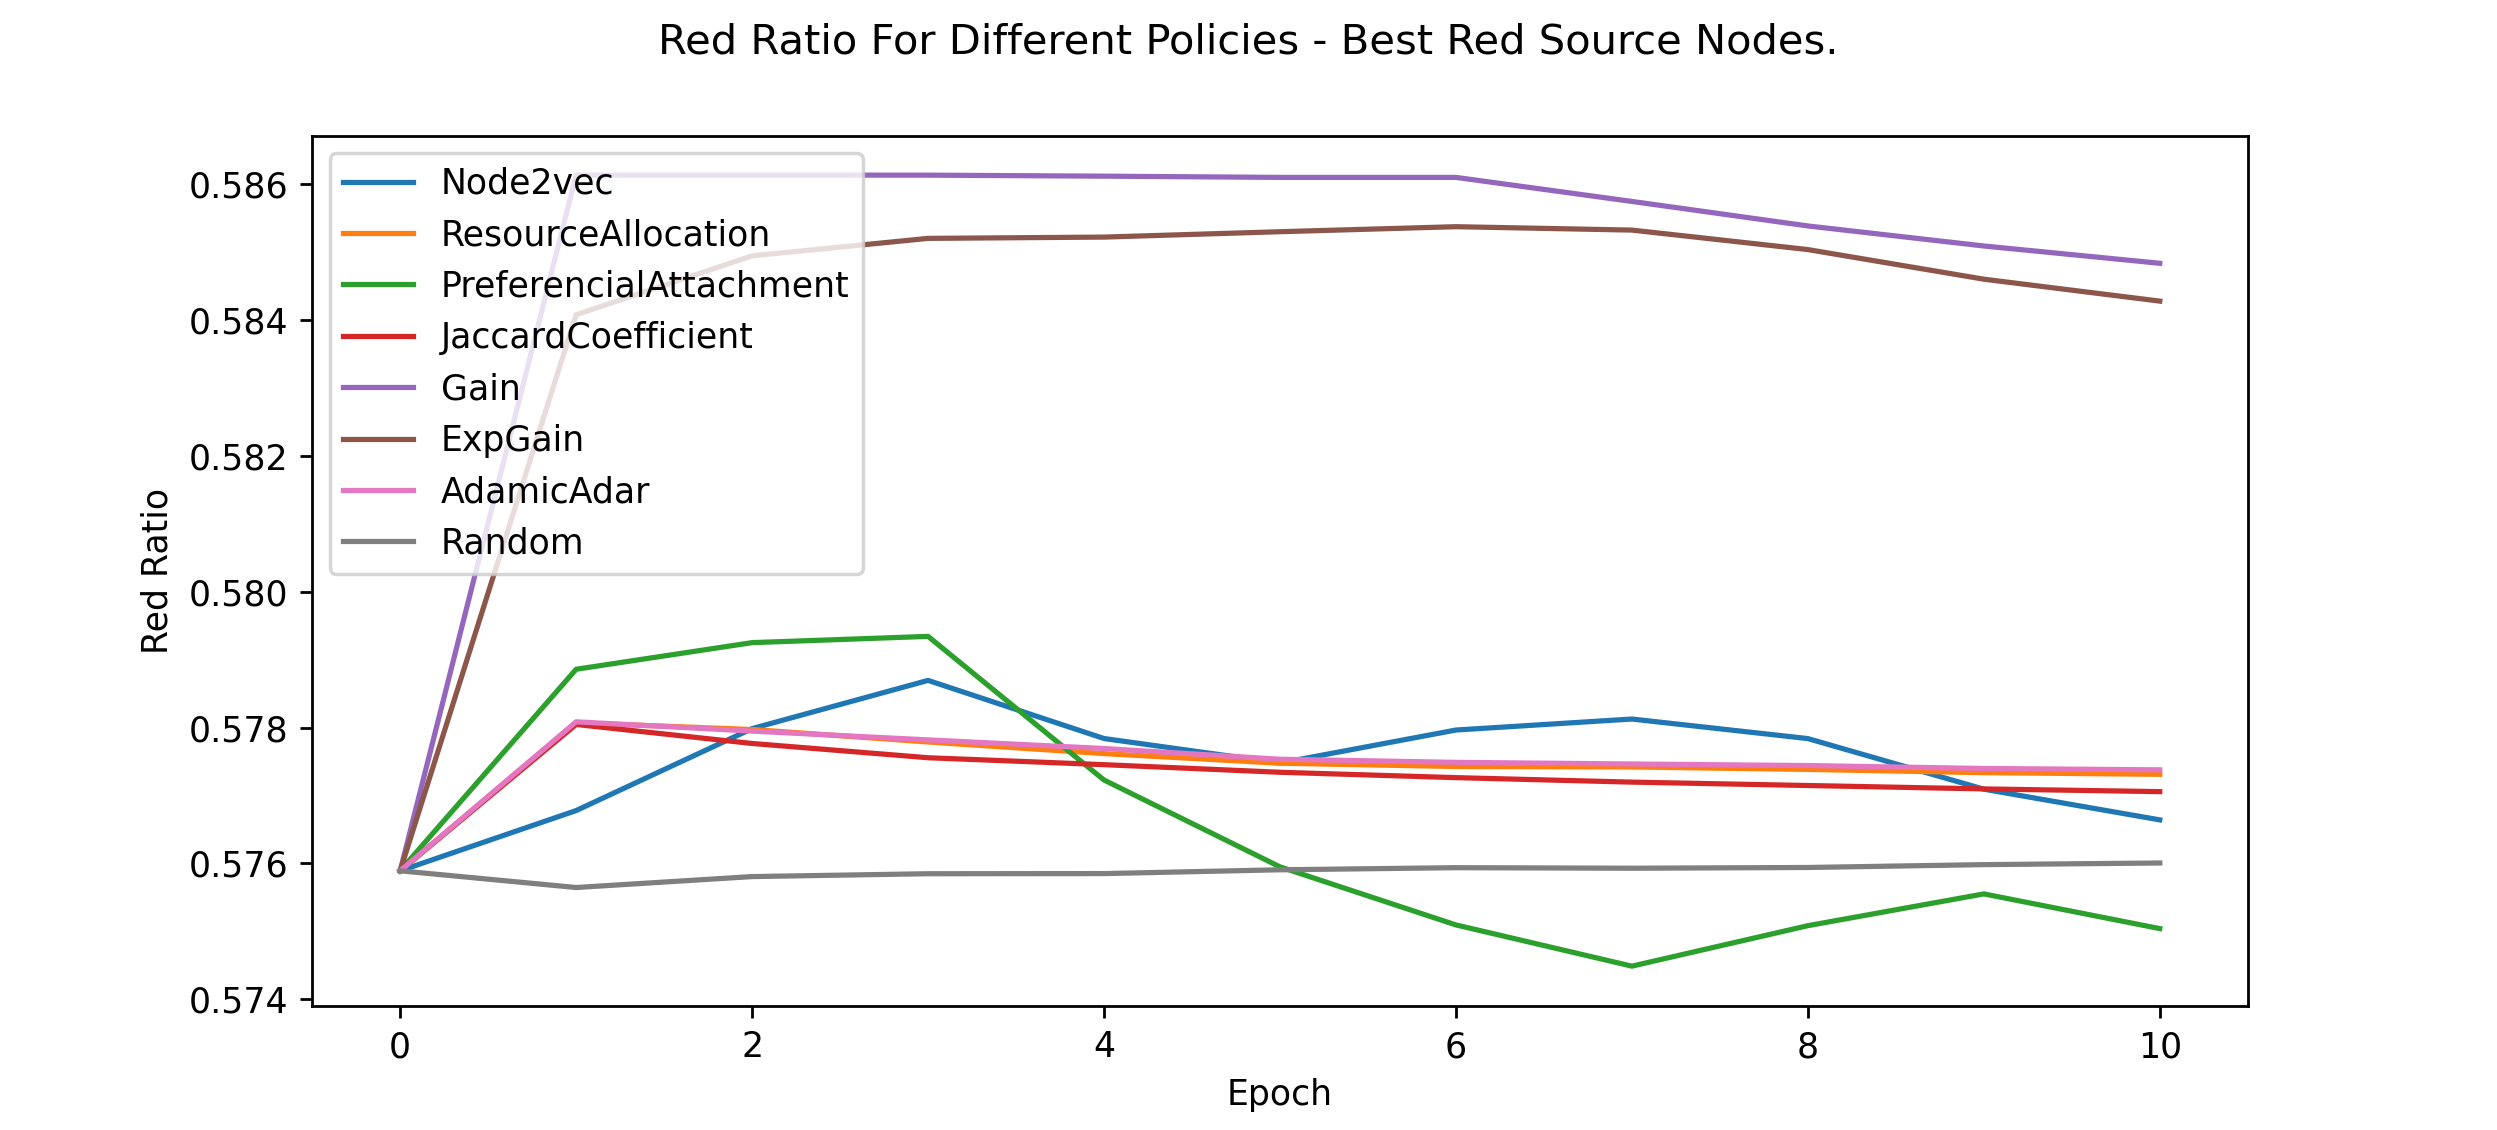

In [6]:
fig = plt.figure()
fig.suptitle('Red Ratio For Different Policies - Best Red Source Nodes.')
plt.xlabel('Epoch')
plt.ylabel('Red Ratio')
xAxis = np.arange(len(redRatio['Node2vec']) )
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Red ratio by different policies - Best blue source nodes.

In [7]:
# Load red ratio per epoch for each policy.
redRatio = dict()
for policy in policies:    
    redRatio[policy] = np.loadtxt('redRatioBy%sBlueSources.txt' %policy)

<IPython.core.display.Javascript object>


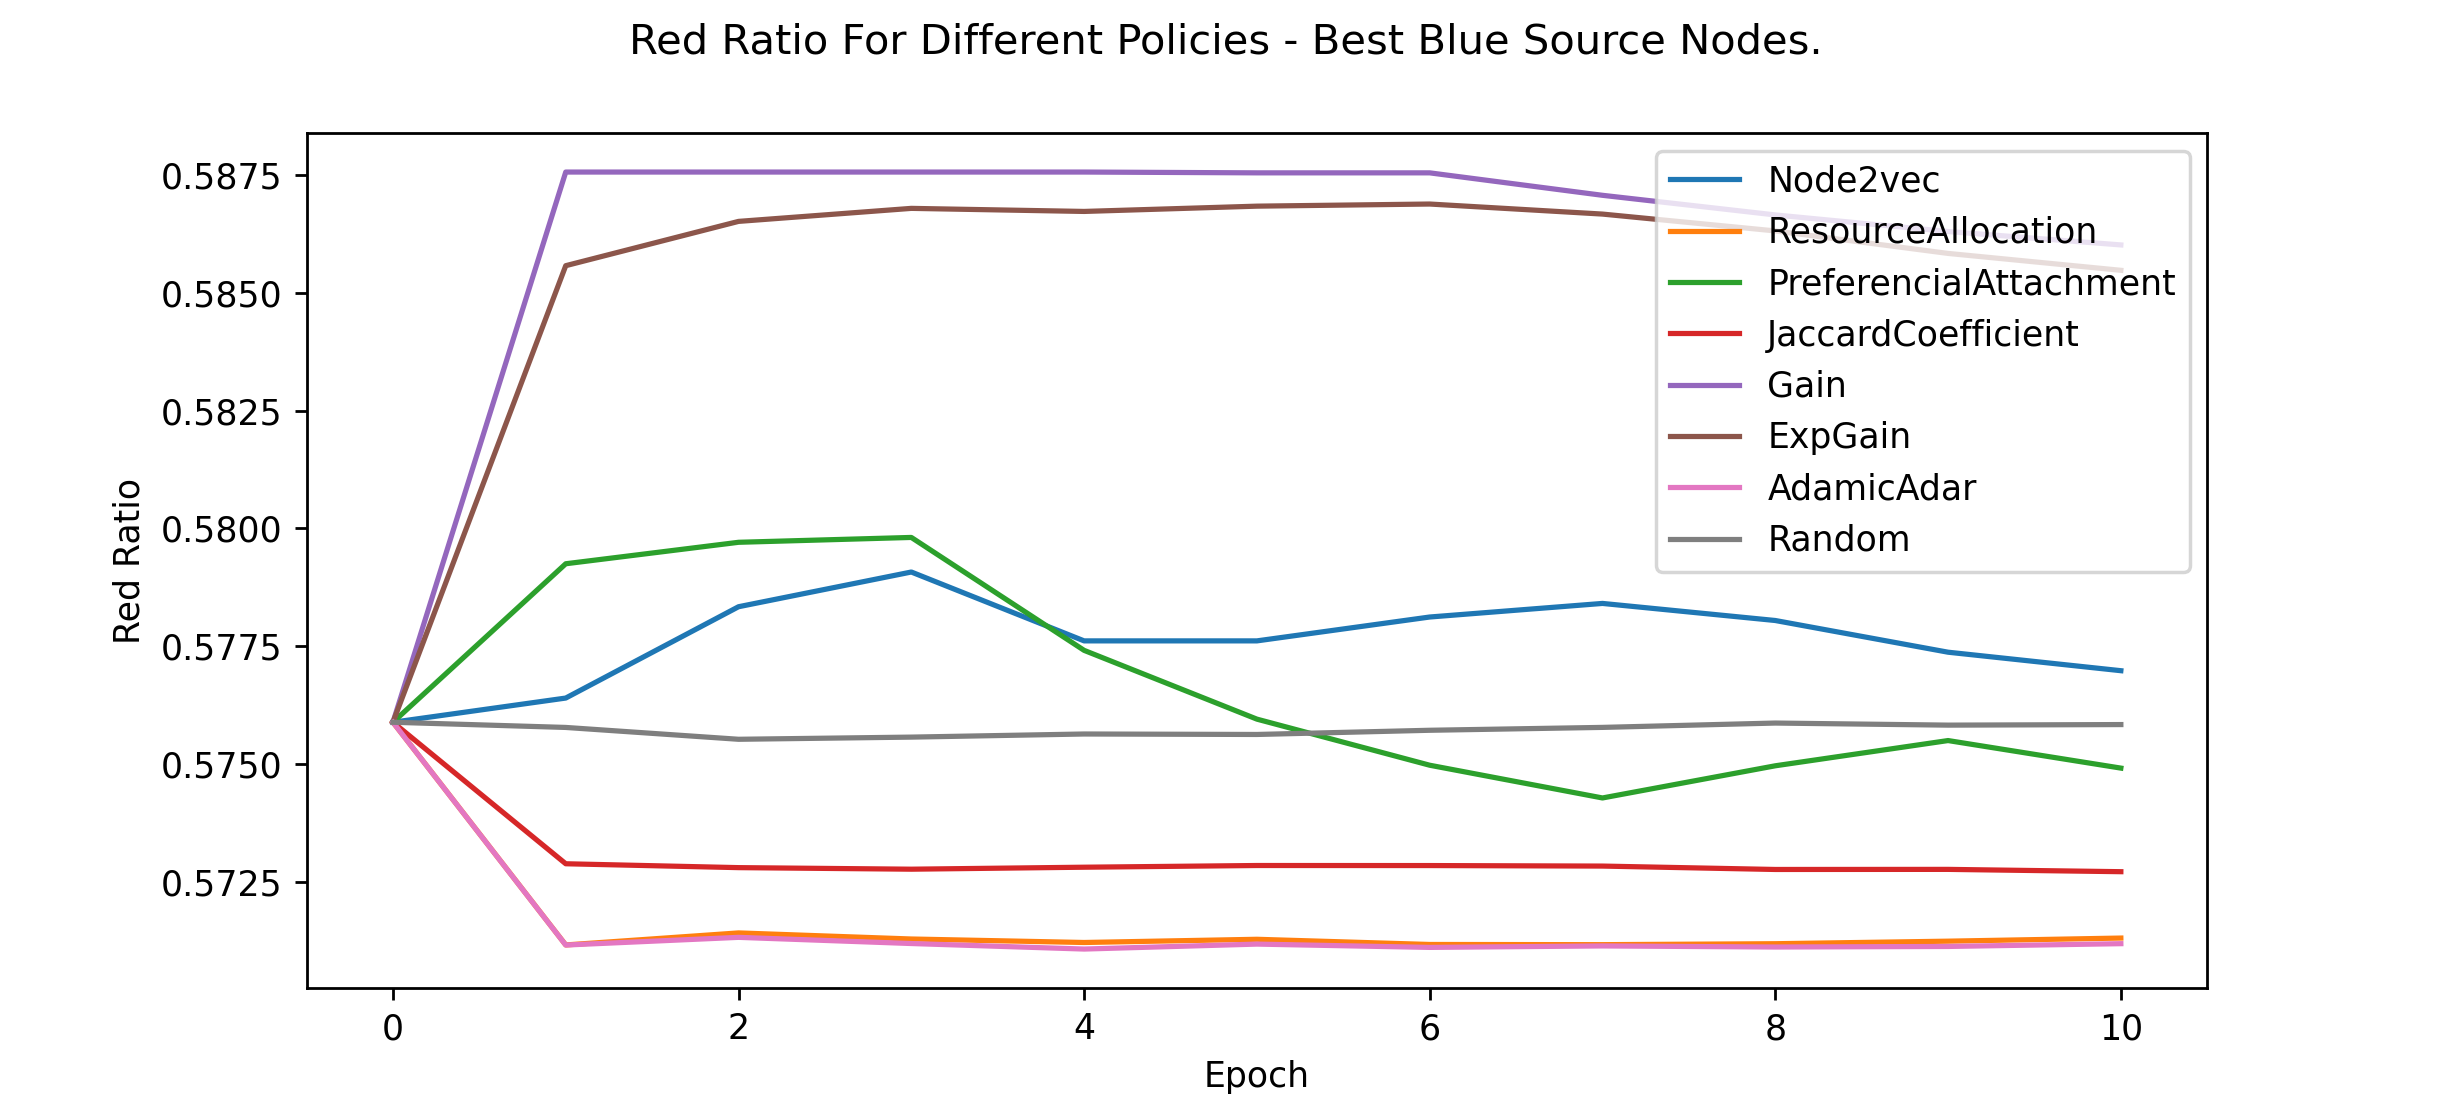

In [8]:
fig = plt.figure()
fig.suptitle('Red Ratio For Different Policies - Best Blue Source Nodes.')
plt.xlabel('Epoch')
plt.ylabel('Red Ratio')
xAxis = np.arange(len(redRatio['Node2vec']) )
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Average acceptance probability (node2vec recommendation) by different policies - Random source nodes.

In [9]:
# Load red ratio per epoch for each policy.
redRatio = dict()
for policy in policies:    
    redRatio[policy] = np.loadtxt('node2vecBy%sRandomSources.txt' %policy)

<IPython.core.display.Javascript object>


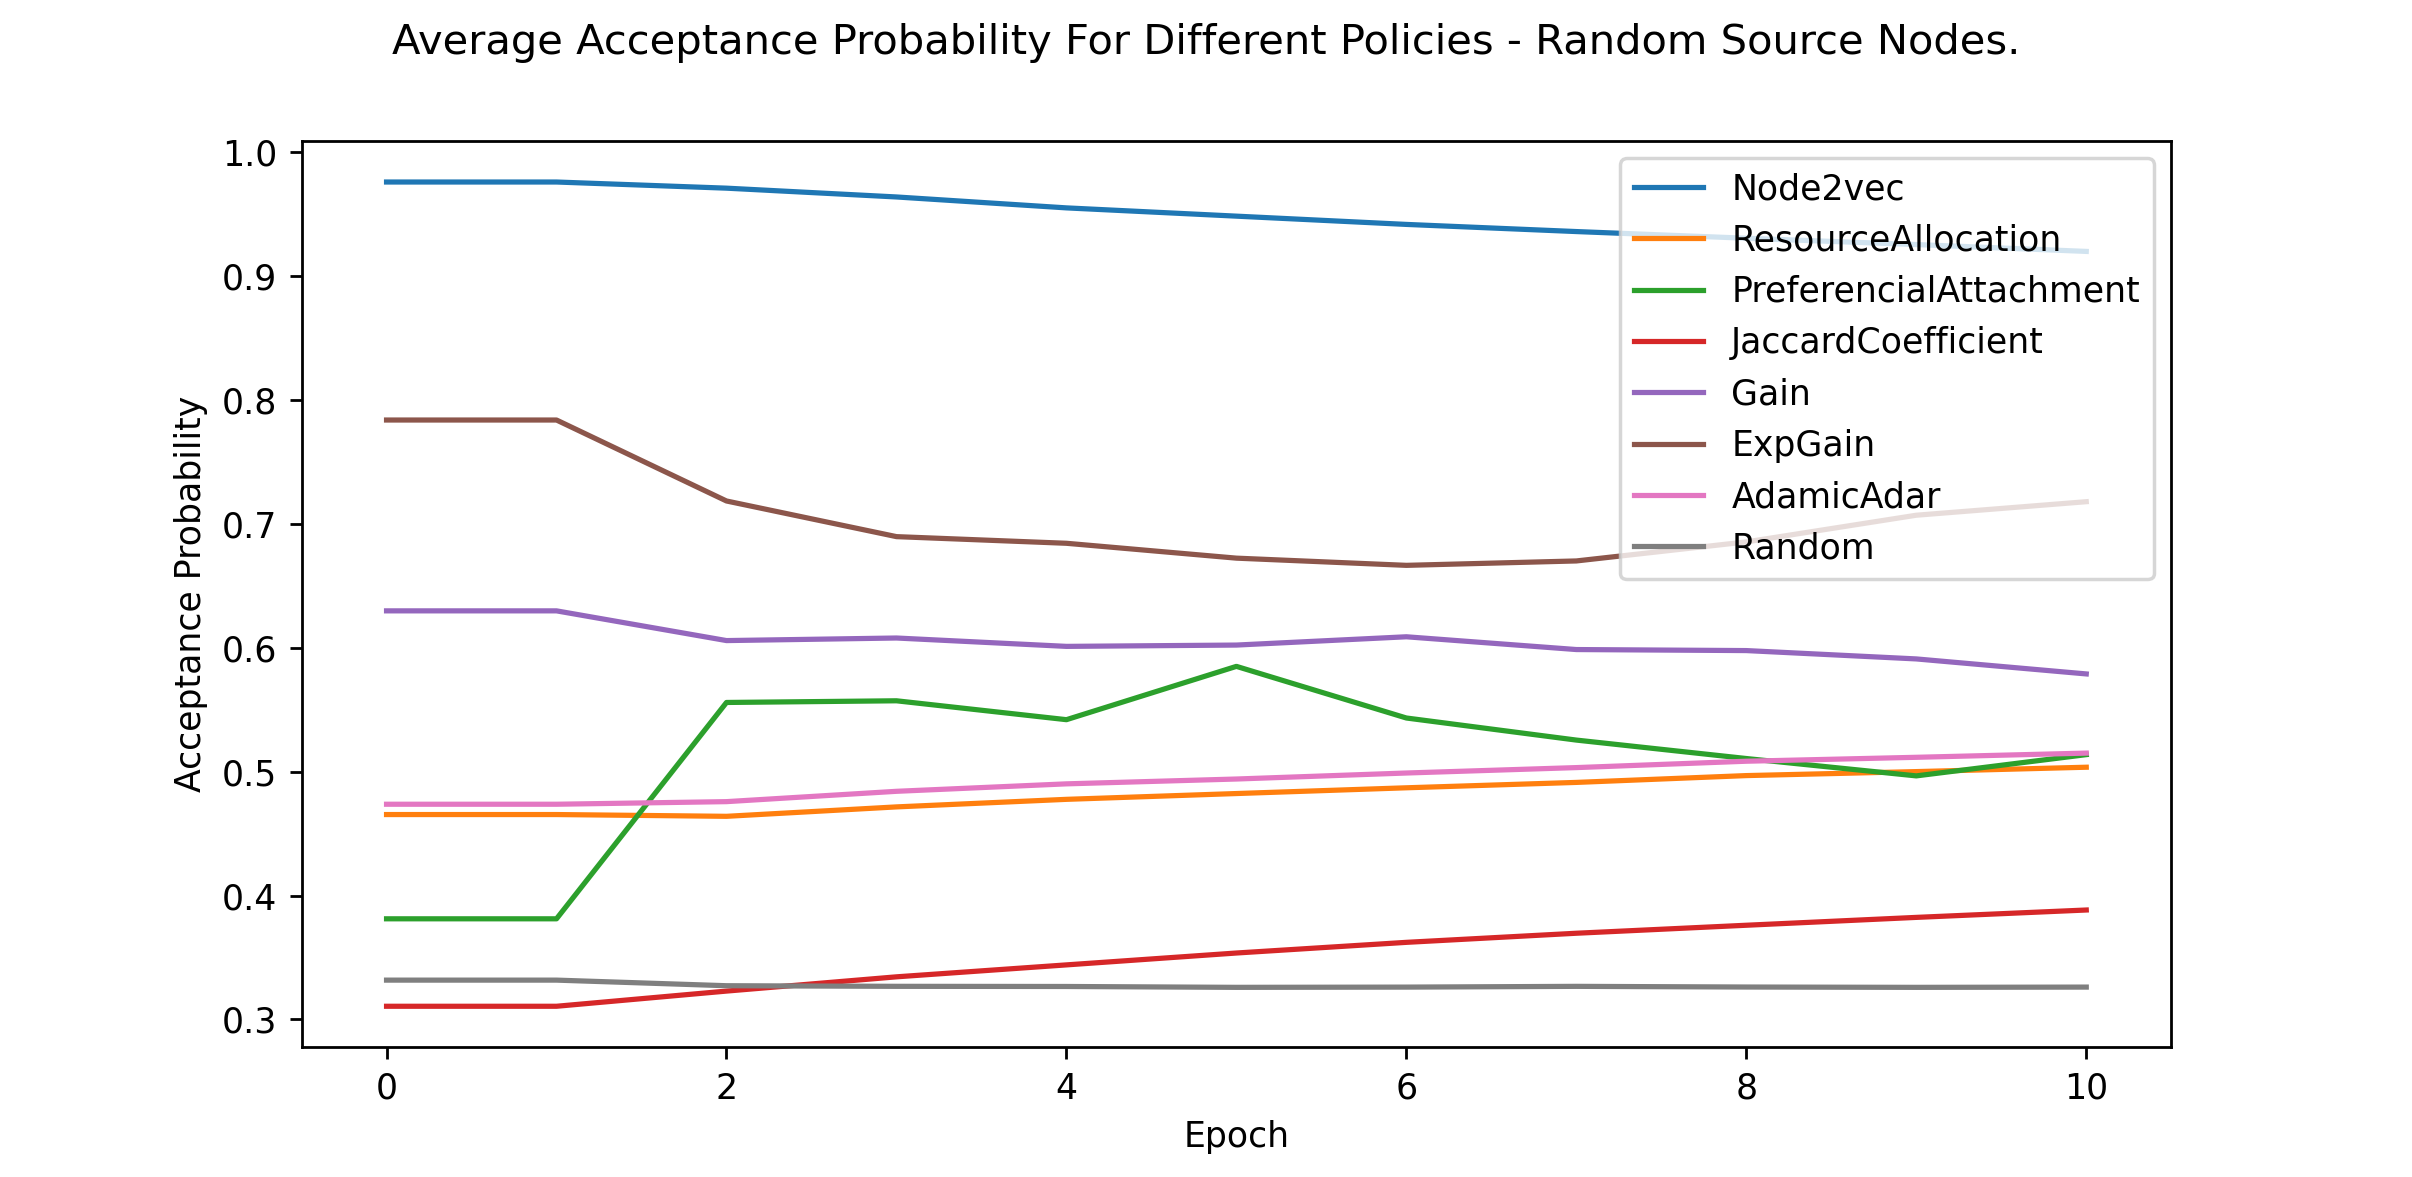

In [10]:
fig = plt.figure()
fig.suptitle('Average Acceptance Probability For Different Policies - Random Source Nodes.')
plt.xlabel('Epoch')
plt.ylabel('Acceptance Probability')
xAxis = np.arange(len(redRatio['Node2vec']) )
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Average acceptance probability (node2vec recommendation) by different policies - Best red source nodes.

In [11]:
# Load red ratio per epoch for each policy.
redRatio = dict()
for policy in policies:    
    redRatio[policy] = np.loadtxt('node2vecBy%sRedSources.txt' %policy)

<IPython.core.display.Javascript object>


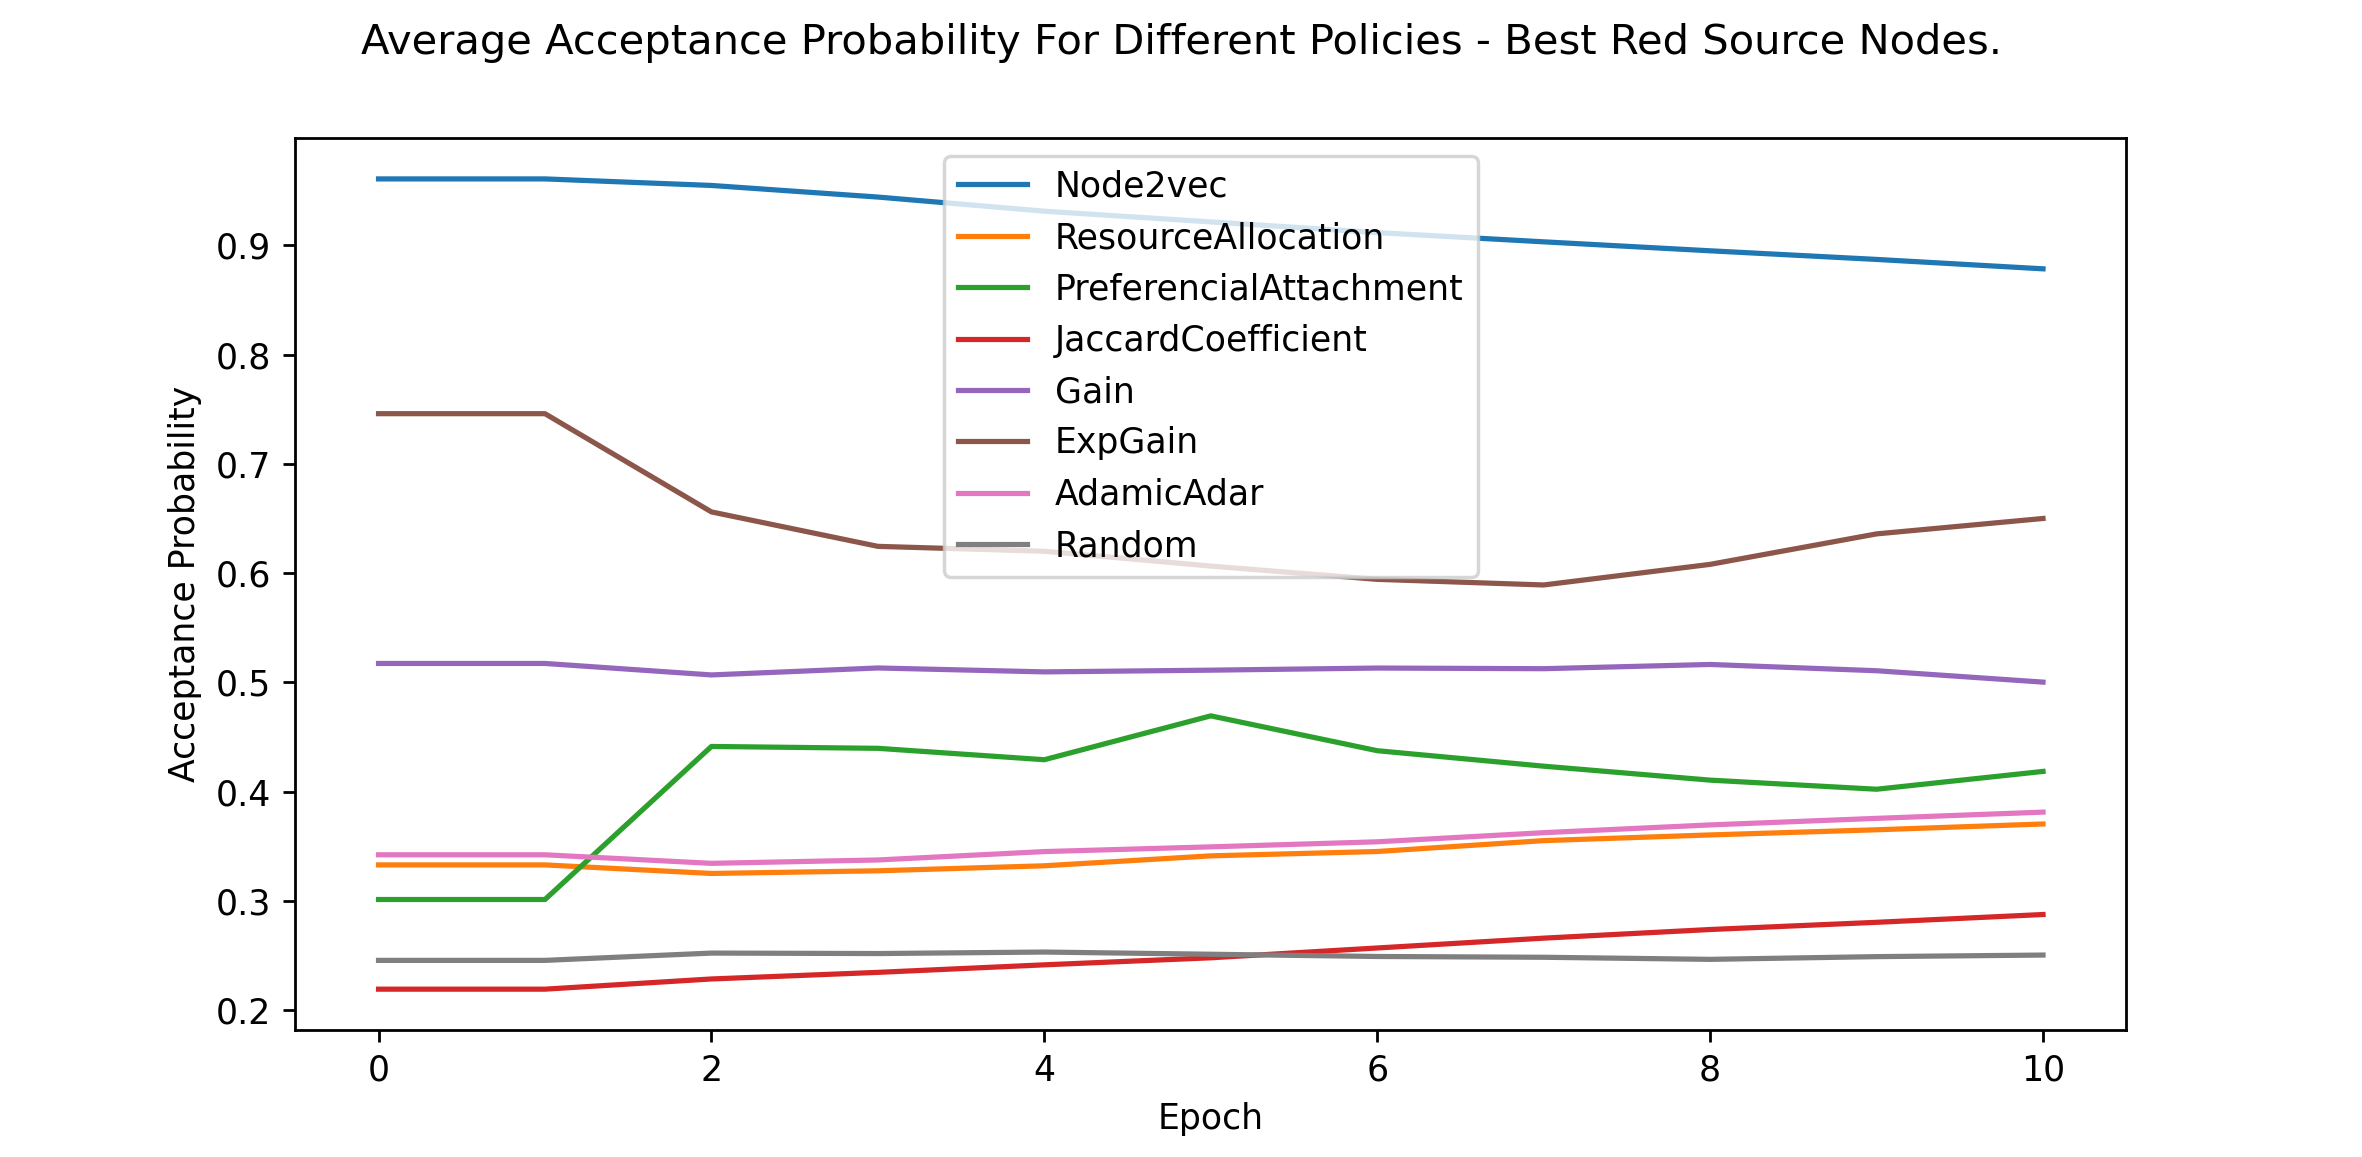

In [12]:
fig = plt.figure()
fig.suptitle('Average Acceptance Probability For Different Policies - Best Red Source Nodes.')
plt.xlabel('Epoch')
plt.ylabel('Acceptance Probability')
xAxis = np.arange(len(redRatio['Node2vec']) )
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Average acceptance probability (node2vec recommendation) by different policies - Best blue source nodes.

In [13]:
# Load red ratio per epoch for each policy.
redRatio = dict()
for policy in policies:    
    redRatio[policy] = np.loadtxt('node2vecBy%sBlueSources.txt' %policy)

<IPython.core.display.Javascript object>


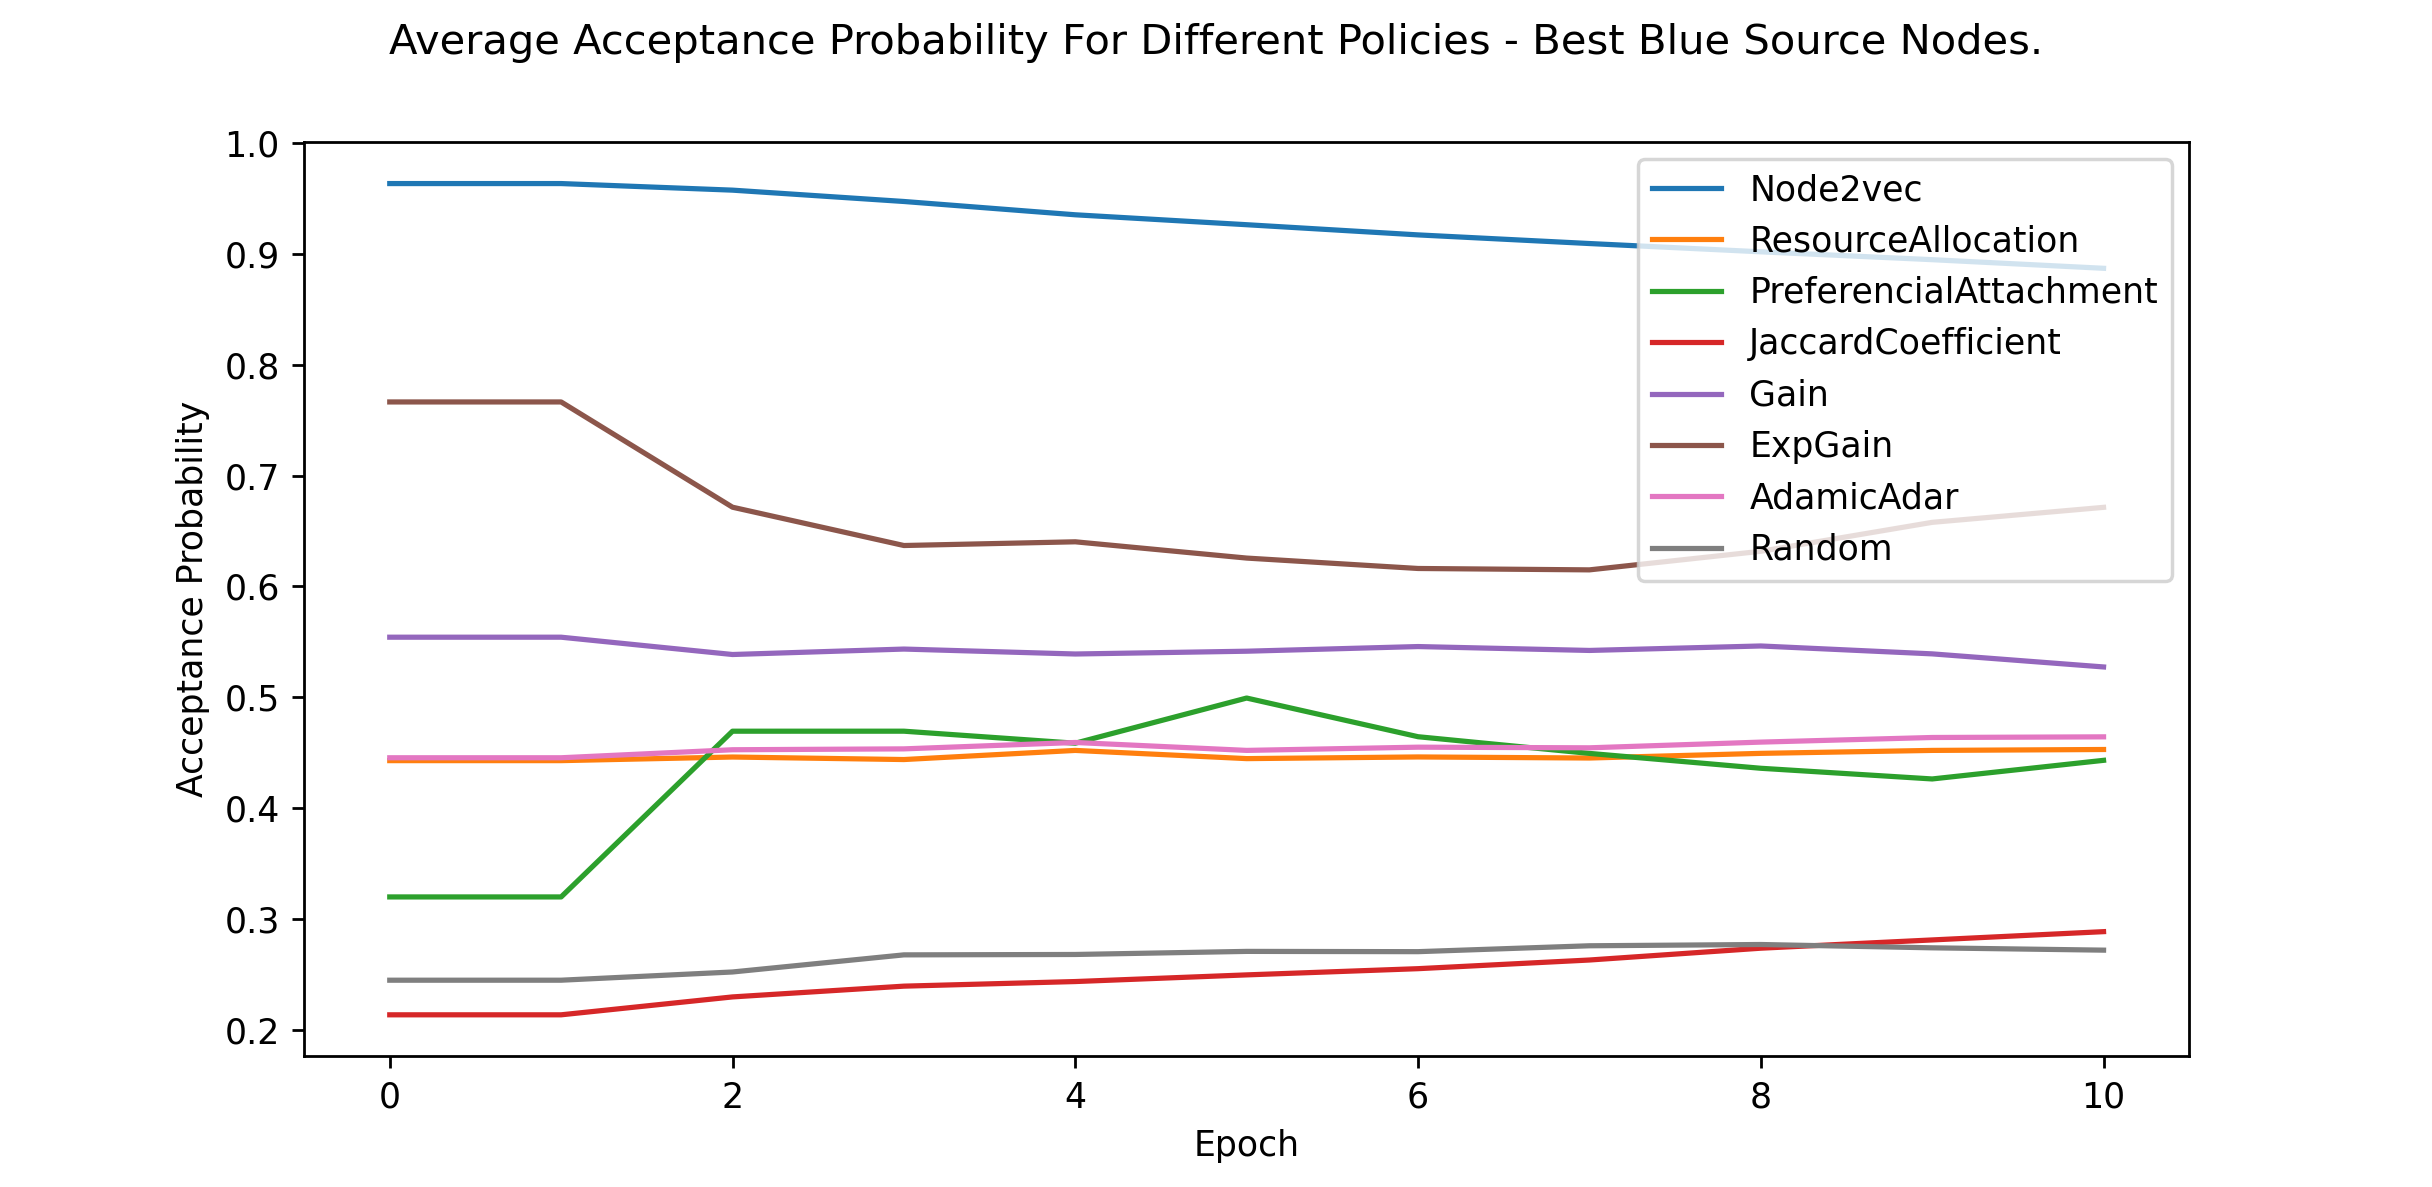

In [14]:
fig = plt.figure()
fig.suptitle('Average Acceptance Probability For Different Policies - Best Blue Source Nodes.')
plt.xlabel('Epoch')
plt.ylabel('Acceptance Probability')
xAxis = np.arange(len(redRatio['Node2vec']) )
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Final PageRank vs initial PageRank - Random source nodes.

In [15]:
# Load PageRanks.
initialPagerank = np.loadtxt('out_pagerank.txt', skiprows= 1, usecols= 1)
finalPagerank = dict()
for policy in policies:
    finalPagerank[policy] = np.loadtxt('finalPagerankBy%sRandomSources.txt' %policy, skiprows=1, usecols= 1)

In [16]:
# Load Communities.
tempCommunities = np.loadtxt('out_community.txt', skiprows= 1, dtype =int)
communities= np.zeros(tempCommunities[:,1].size, dtype= int)

for i in range(communities.size):
    node = tempCommunities[i][0]
    community = tempCommunities[i][1]
    communities[node] = community

In [17]:
# To calculate red ratio of network every 10 nodes.
def getRedRatio(pagerank, communities):
    index = np.argsort(-pagerank)
    redPagerank = 0.
    totalPagerank = 0.
    redRatio = 0.
    redRatios = []
    for i in range(pagerank.size):
        totalPagerank += pagerank[index[i] ]
        if communities[index[i] ]:
            redPagerank += pagerank[index[i] ]
        if (i + 1) % 10 == 0:
            redRatio = redPagerank / totalPagerank
            redRatios.append(redRatio)
    
    return redRatios

In [18]:
# Calculate red ratio per 10 nodes for all policies.
initialRedRatio = getRedRatio(initialPagerank, communities)
redRatios = dict()
for policy in policies:
    redRatio[policy] = getRedRatio(finalPagerank[policy], communities)

<IPython.core.display.Javascript object>


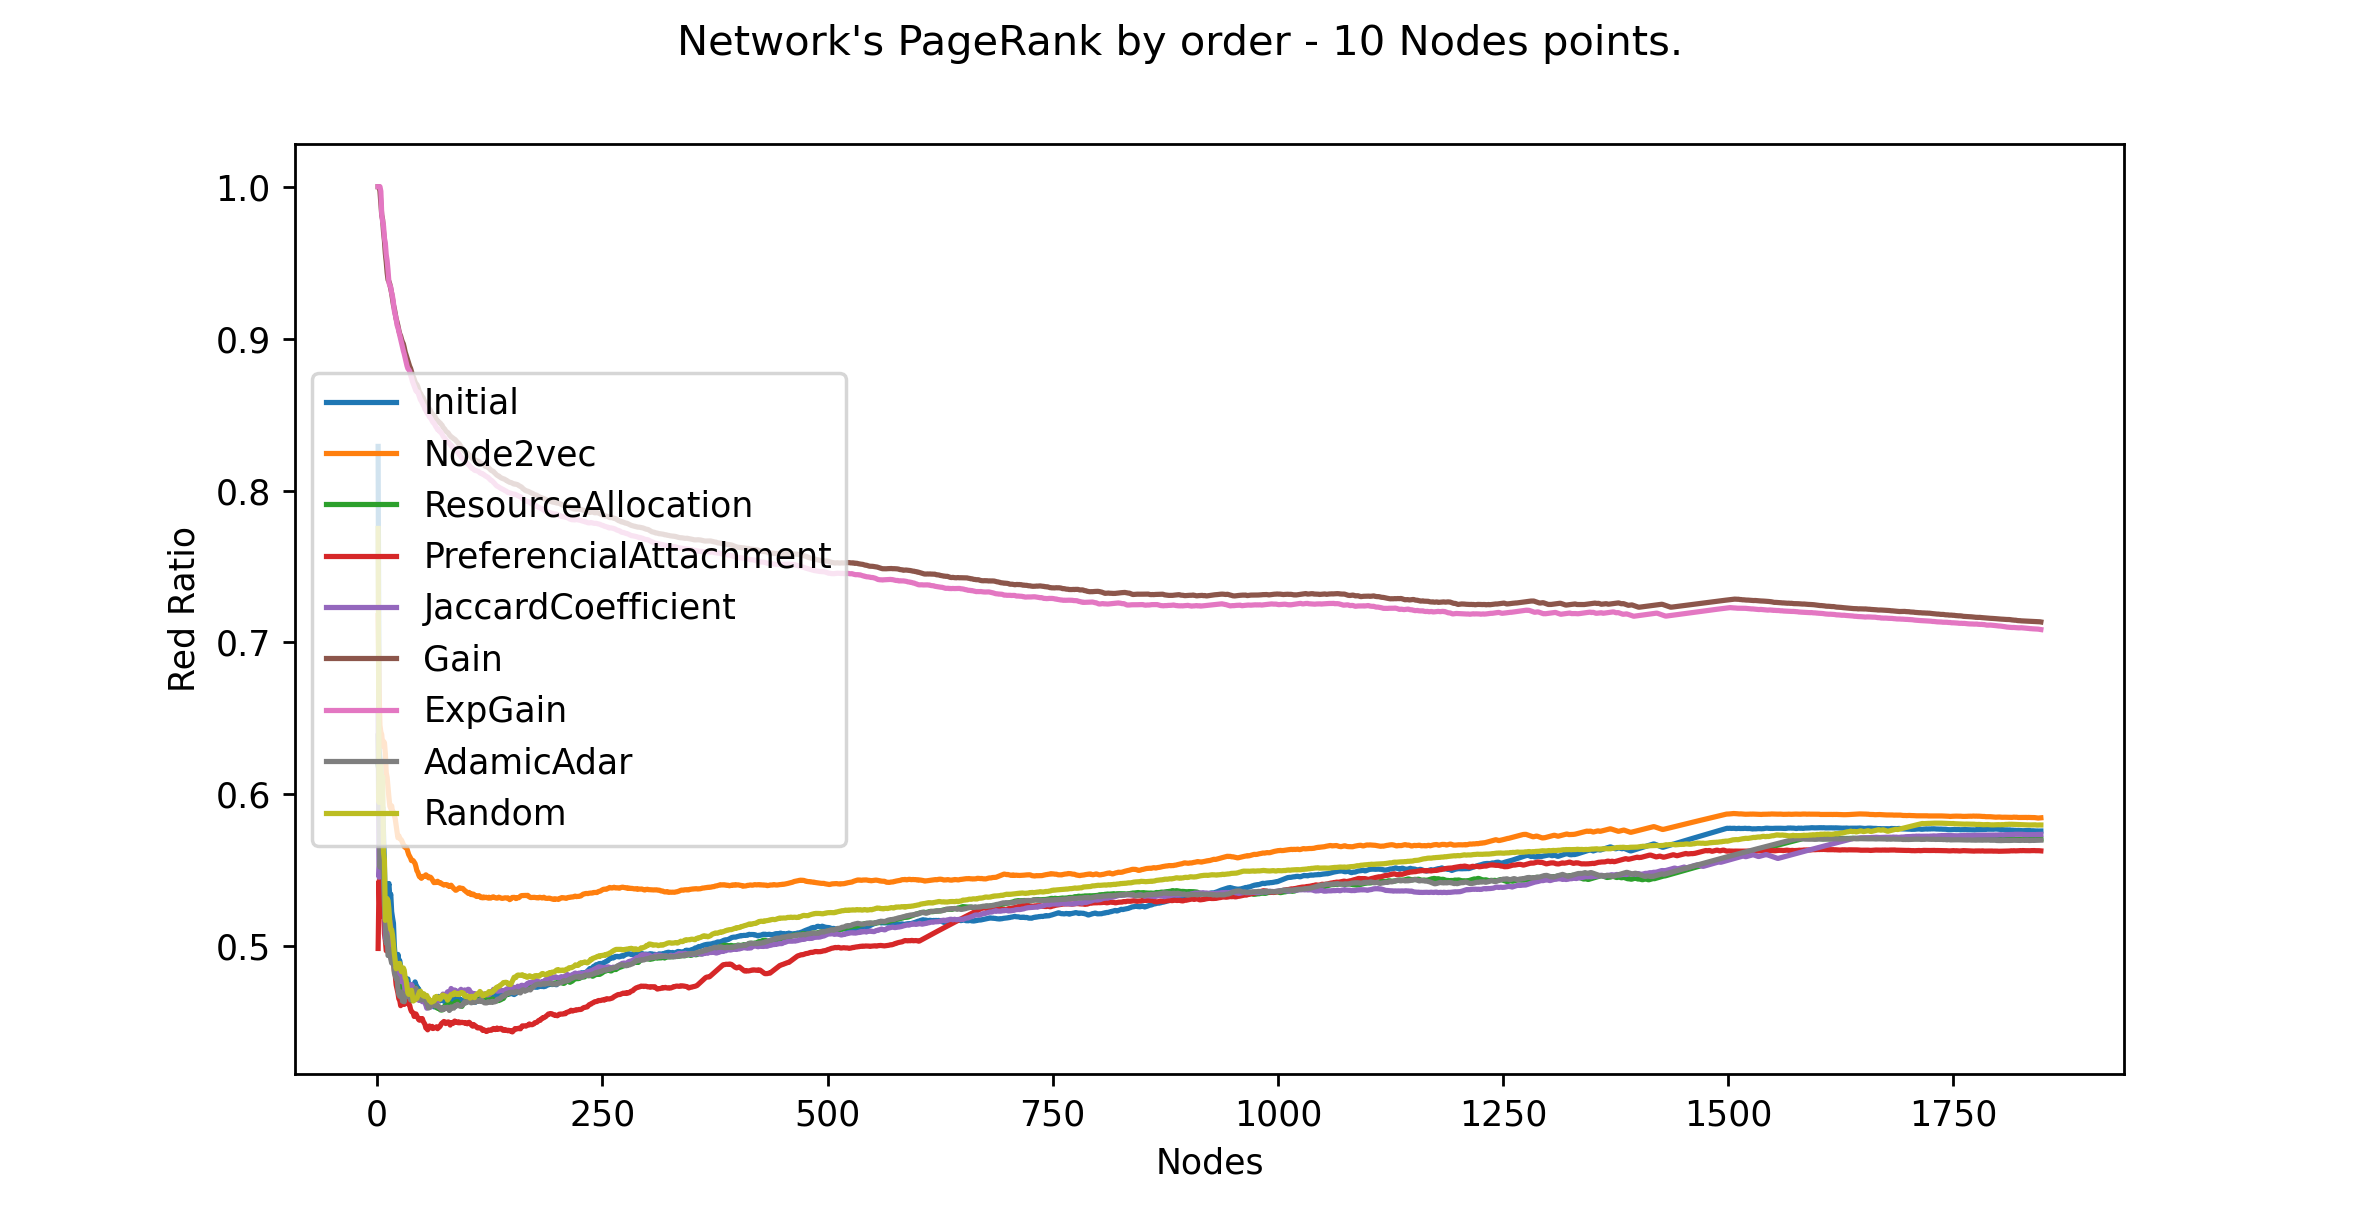

In [19]:
fig = plt.figure()
fig.suptitle("Network's PageRank by order - 10 Nodes points.")
plt.xlabel("Nodes")
plt.ylabel("Red Ratio")
xAxis= np.arange(1, len(initialRedRatio) + 1)
plt.plot(xAxis, initialRedRatio, label= 'Initial')
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Final PageRank vs initial PageRank - Best red source nodes.

In [20]:
finalPagerank = dict()
for policy in policies:
    finalPagerank[policy] = np.loadtxt('finalPagerankBy%sRedSources.txt' %policy, skiprows=1, usecols= 1)

In [21]:
# Calculate red ratio per 10 nodes for all policies.
initialRedRatio = getRedRatio(initialPagerank, communities)
redRatios = dict()
for policy in policies:
    redRatio[policy] = getRedRatio(finalPagerank[policy], communities)

<IPython.core.display.Javascript object>


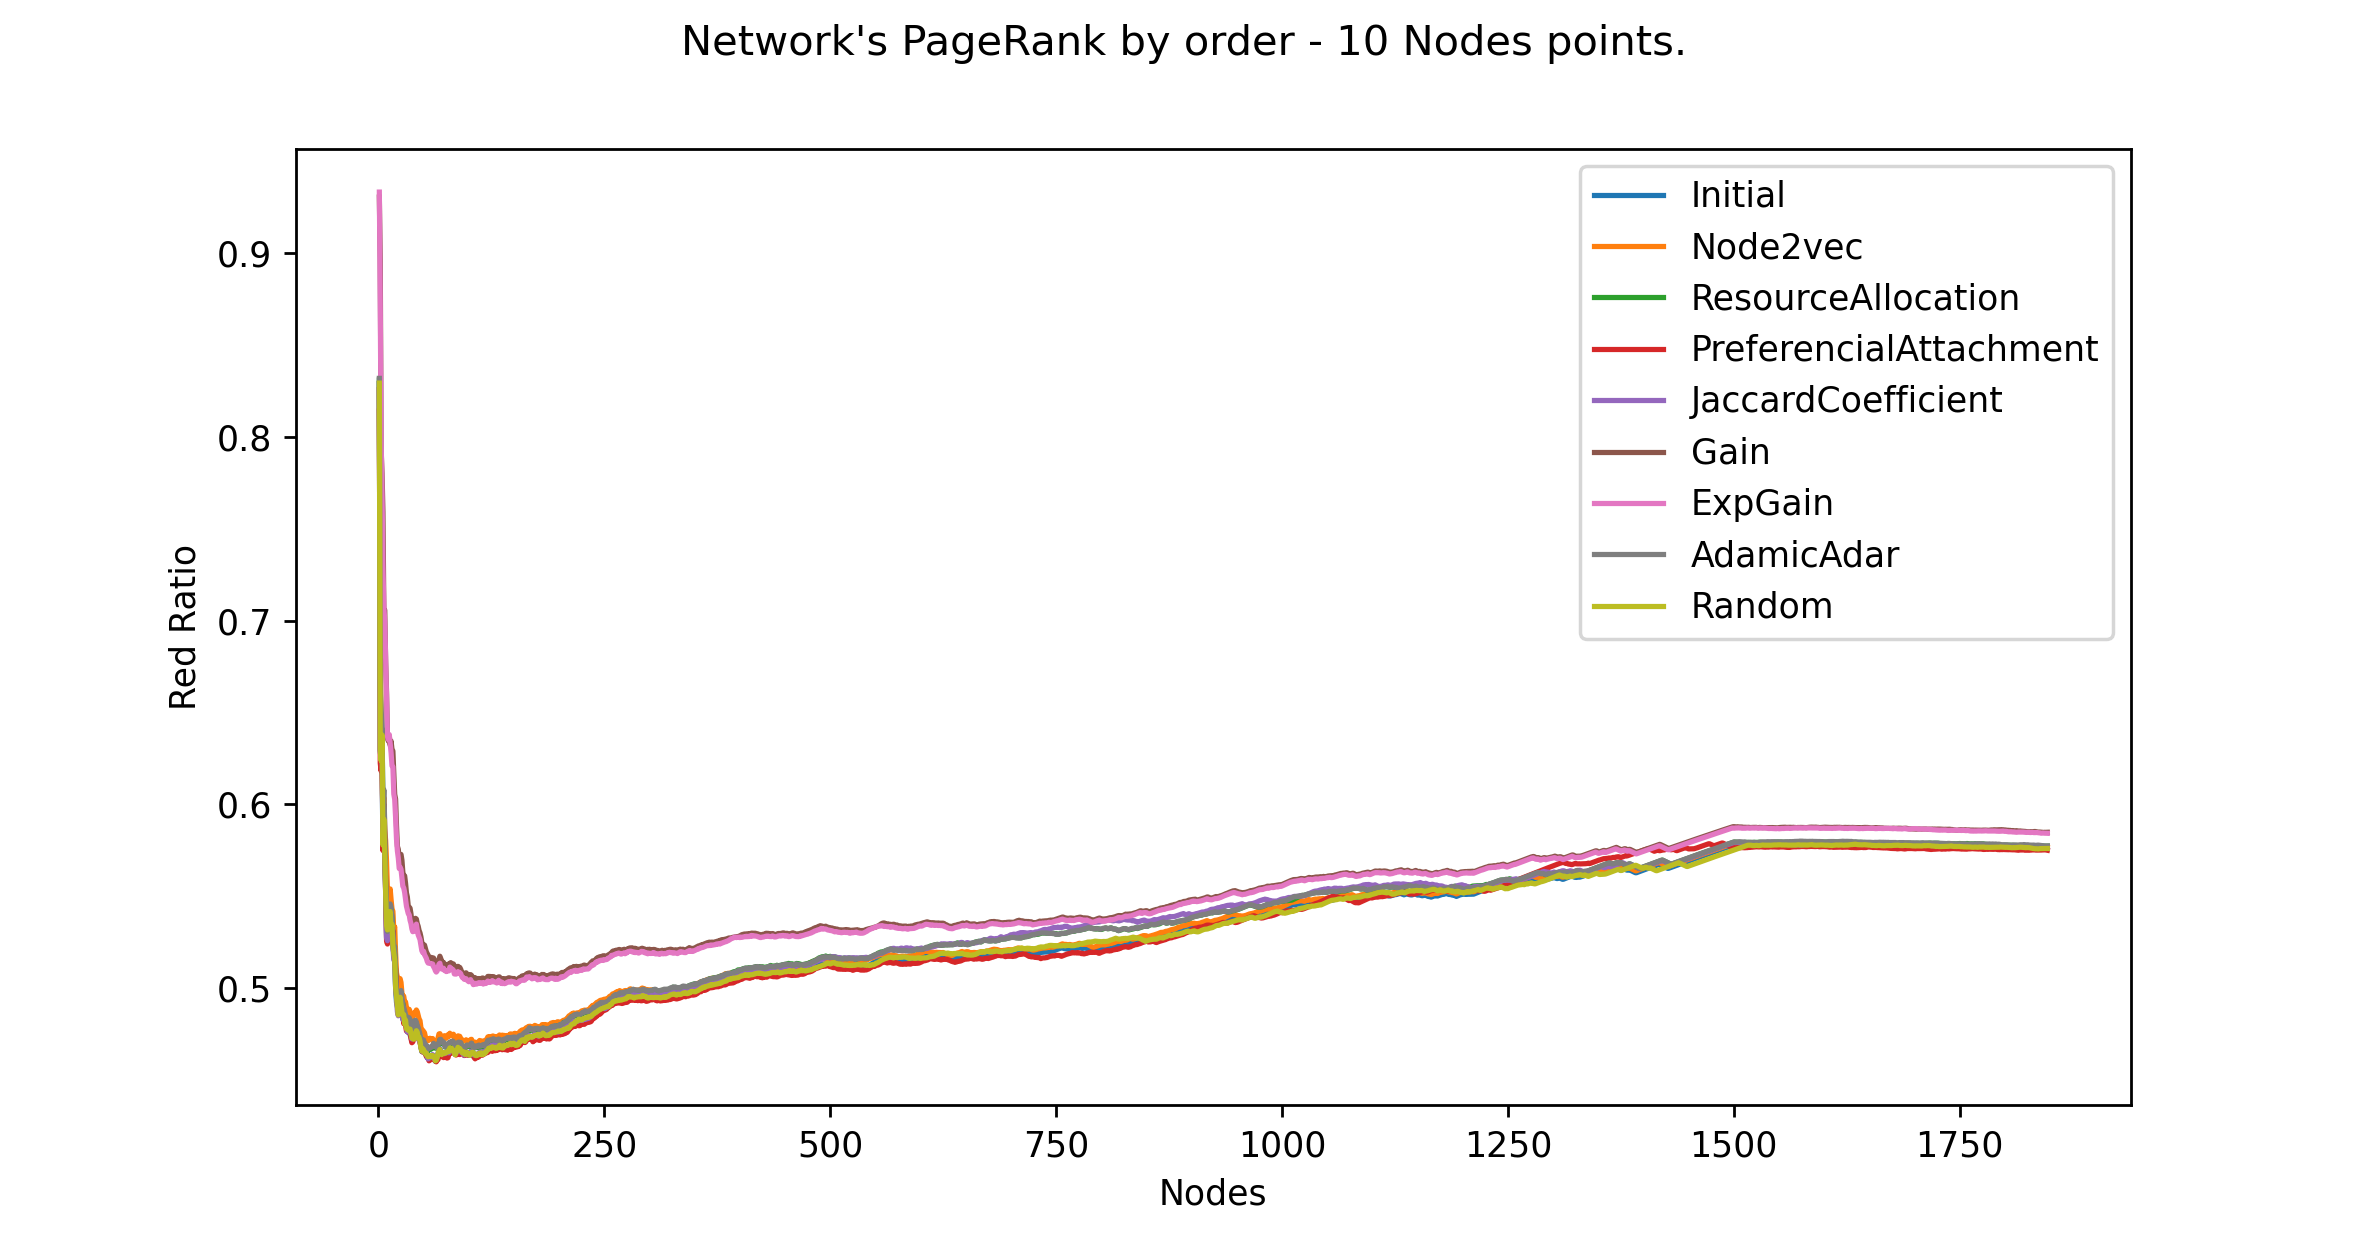

In [22]:
fig = plt.figure()
fig.suptitle("Network's PageRank by order - 10 Nodes points.")
plt.xlabel("Nodes")
plt.ylabel("Red Ratio")
xAxis= np.arange(1, len(initialRedRatio) + 1)
plt.plot(xAxis, initialRedRatio, label= 'Initial')
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Final PageRank vs initial PageRank - Best blue source nodes.

In [23]:
finalPagerank = dict()
for policy in policies:
    finalPagerank[policy] = np.loadtxt('finalPagerankBy%sBlueSources.txt' %policy, skiprows=1, usecols= 1)

In [24]:
# Calculate red ratio per 10 nodes for all policies.
initialRedRatio = getRedRatio(initialPagerank, communities)
redRatios = dict()
for policy in policies:
    redRatio[policy] = getRedRatio(finalPagerank[policy], communities)

<IPython.core.display.Javascript object>


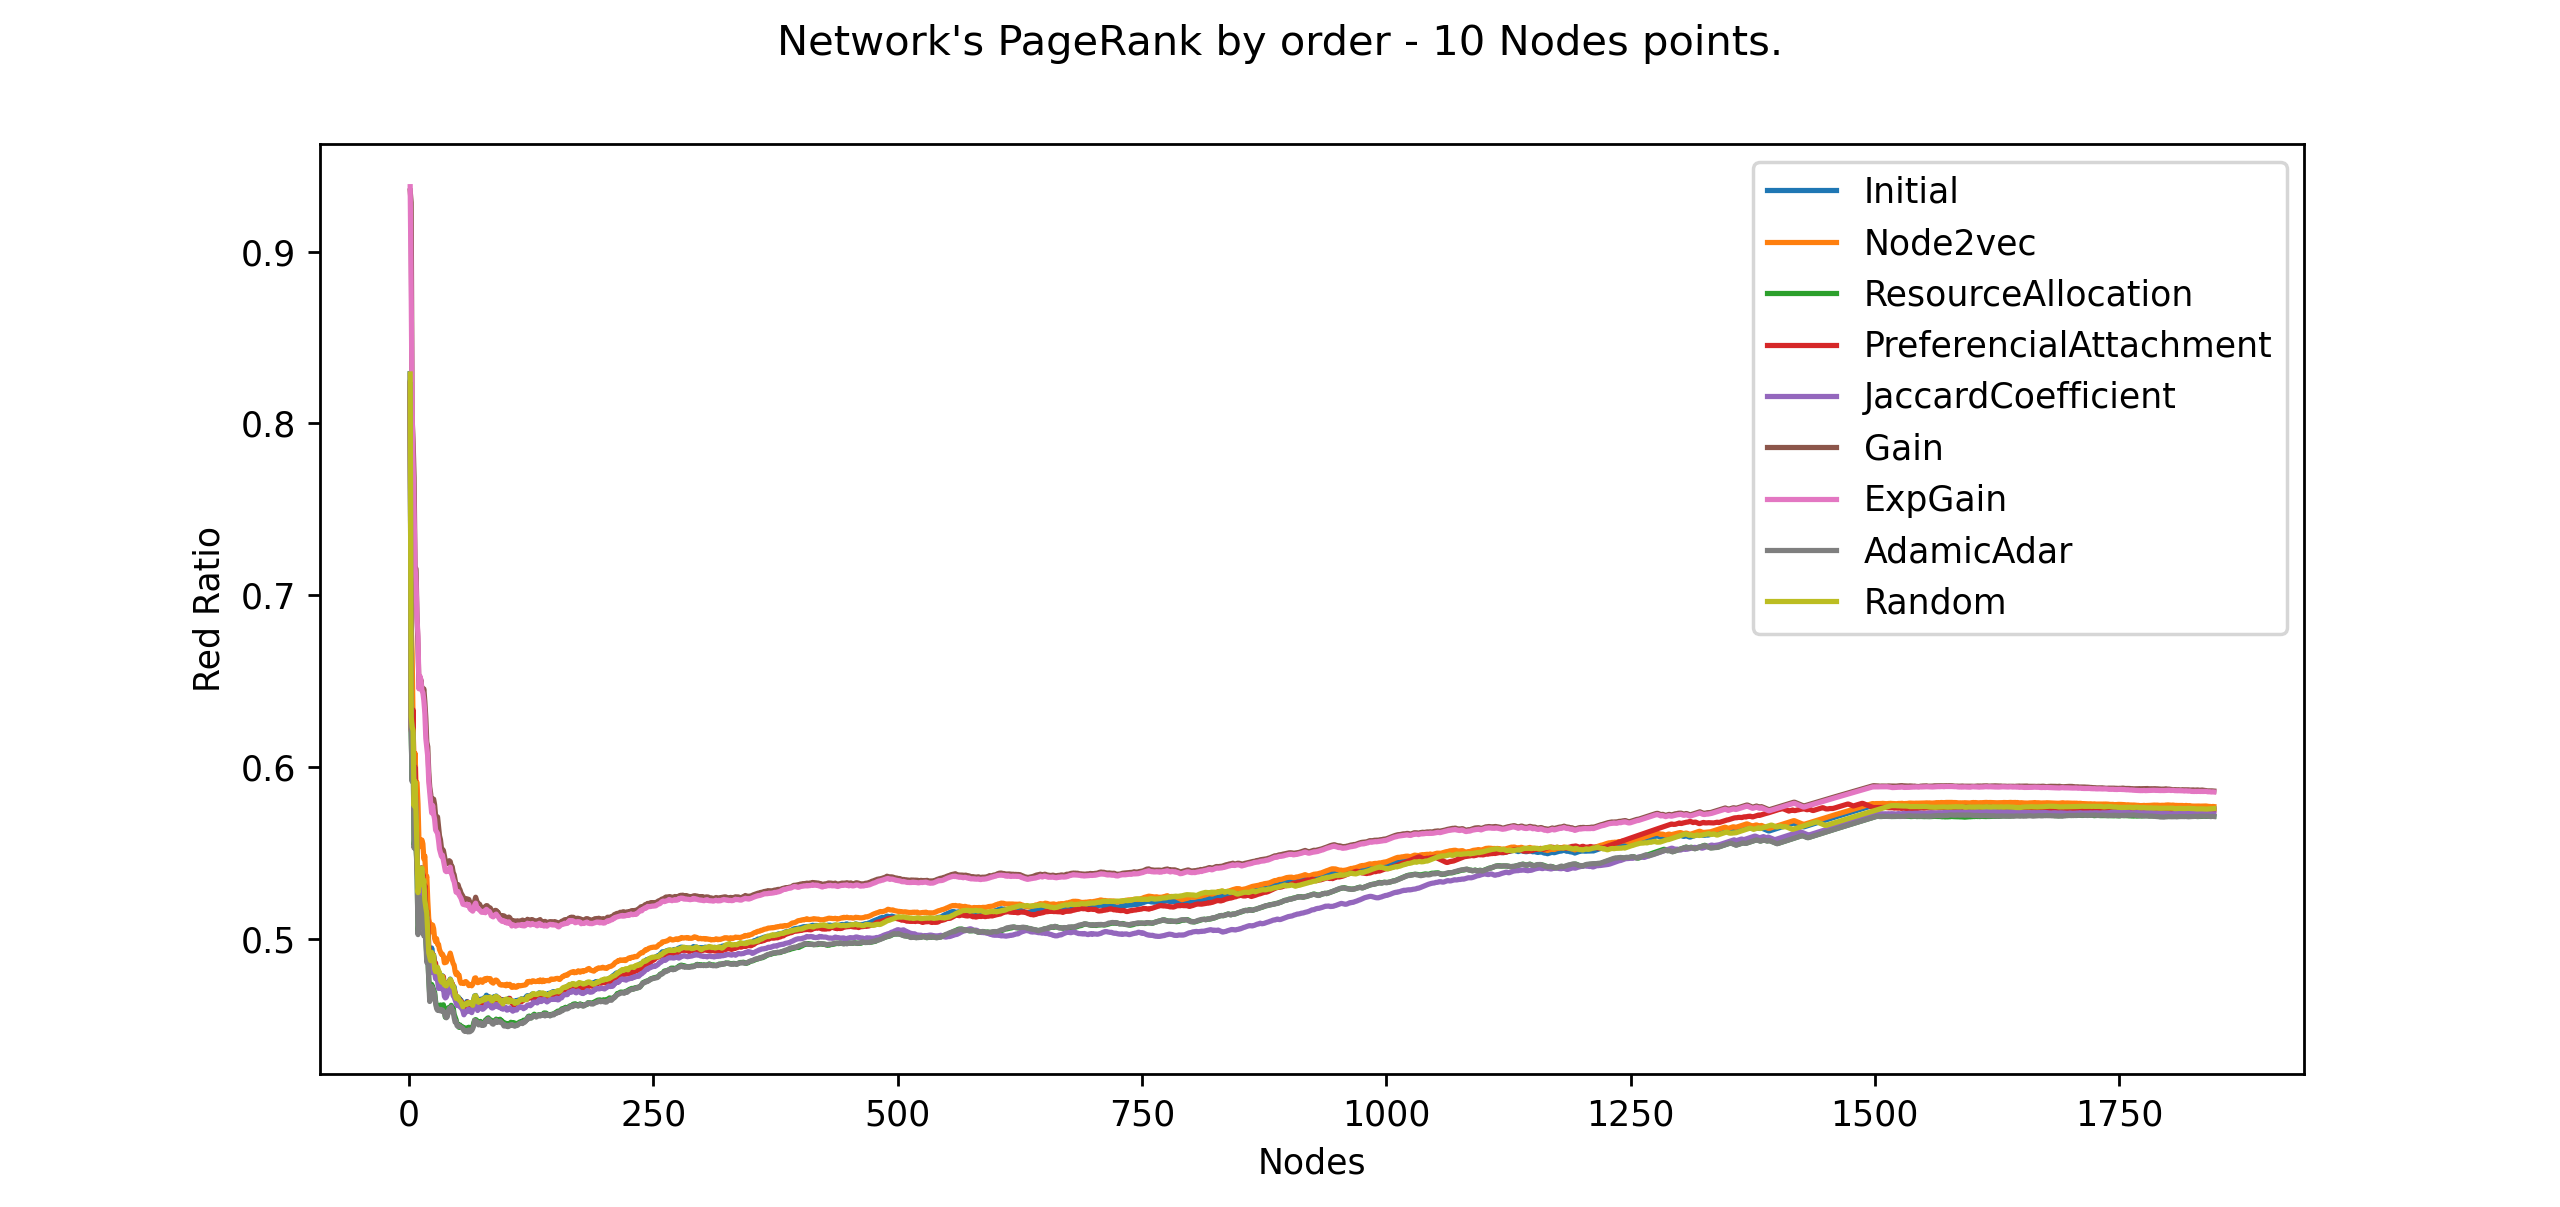

In [25]:
fig = plt.figure()
fig.suptitle("Network's PageRank by order - 10 Nodes points.")
plt.xlabel("Nodes")
plt.ylabel("Red Ratio")
xAxis= np.arange(1, len(initialRedRatio) + 1)
plt.plot(xAxis, initialRedRatio, label= 'Initial')
for policy in policies:
    plt.plot(xAxis, redRatio[policy], label= policy)
plt.legend()

### Target nodes analysis by each policy - Random source nodes.

In [26]:
# Load edges selected by each policy.
edgesSelected = dict()
for policy in policies:
    edgesSelected[policy] = pd.read_csv('edgesSelectedBy%sRandomSources.txt' %policy, sep= '\t')

In [27]:
edgesSelected['Node2vec'].head()

,Source,Target,node2vecScore,resAllocScore,jaccCoefScore,prefAttScore,adamicAdarScore,gain,expGain
0,16525,0,1.000000,0.000000,0.000000,5,0.000000,-0.000007,-0.000007
1,1190,0,1.000000,0.000000,0.000000,14,0.000000,0.000002,0.000002
2,3593,6964,0.970024,0.003175,0.004785,209,0.173835,0.000030,0.000029
3,7550,6964,0.923008,0.007937,0.004785,209,0.206770,0.000030,0.000028
4,17576,6964,0.937705,0.000000,0.000000,209,0.000000,0.000030,0.000028


In [28]:
uniqueDestinations = dict()
for policy in policies:
    uniqueDestinations[policy] = edgesSelected[policy]['Target'].nunique()

In [29]:
uniqueDestinations

{'Node2vec': 51,
 'ResourceAllocation': 5184,
 'PreferencialAttachment': 12,
 'JaccardCoefficient': 7492,
 'Gain': 154,
 'ExpGain': 105,
 'AdamicAdar': 4833,
 'Random': 11692}

In [30]:
mean = dict()
for policy in policies:
    mean[policy] = edgesSelected[policy].mean().take([2,3,4,5,6,7,8])

mean = pd.DataFrame.from_dict(mean)
print("Mean values for selected edges per policy")
mean

Mean values for selected edges per policy


,Node2vec,ResourceAllocation,PreferencialAttachment,JaccardCoefficient,Gain,ExpGain,AdamicAdar,Random
node2vecScore,0.919964,0.503613,0.513771,3.883605e-01,0.578917,0.717939,0.515007,3.261448e-01
resAllocScore,0.004035,0.086660,0.012807,5.052223e-02,0.000290,0.000814,0.080600,1.795223e-04
jaccCoefScore,0.001693,0.245165,0.001021,4.600524e-01,0.000905,0.001116,0.244389,2.329881e-03
prefAttScore,515.348565,627.630861,2112.380726,3.179956e+02,12.332918,79.976936,777.231456,2.638950e+01
adamicAdarScore,0.050848,0.499783,0.111464,3.863572e-01,0.001747,0.011290,0.532371,2.890983e-03
gain,0.000009,-0.000002,-0.000007,-8.384949e-07,0.000083,0.000079,-0.000003,1.131456e-06
expGain,0.000009,-0.000003,-0.000004,-1.941148e-06,0.000053,0.000057,-0.000004,-1.910666e-07


### Target nodes analysis by each policy - Best red source nodes.

In [31]:
# Load edges selected by each policy.
edgesSelected = dict()
for policy in policies:
    edgesSelected[policy] = pd.read_csv('edgesSelectedBy%sRedSources.txt' %policy, sep= '\t')

In [32]:
uniqueDestinations = dict()
for policy in policies:
    uniqueDestinations[policy] = edgesSelected[policy]['Target'].nunique()
uniqueDestinations

{'Node2vec': 13,
 'ResourceAllocation': 648,
 'PreferencialAttachment': 10,
 'JaccardCoefficient': 705,
 'Gain': 19,
 'ExpGain': 23,
 'AdamicAdar': 636,
 'Random': 972}

In [190]:
mean = dict()
for policy in policies:
    mean[policy] = edgesSelected[policy].mean().take([2,3,4,5,6,7,8])

mean = pd.DataFrame.from_dict(mean)
print("Mean values for selected edges per policy")
mean

Mean values for selected edges per policy


,Node2vec,ResourceAllocation,PreferencialAttachment,JaccardCoefficient,Gain,ExpGain,AdamicAdar,Random
node2vecScore,0.673800,0.516824,0.626146,0.380776,0.301394,0.571095,0.511317,0.361328
resAllocScore,0.122551,0.239108,0.136179,0.138787,0.007240,0.060847,0.223446,0.013487
jaccCoefScore,0.021400,0.090760,0.019588,0.262745,0.027541,0.030433,0.095939,0.020356
prefAttScore,3177.395000,2936.491000,4582.956000,1338.508000,67.438000,1035.603000,3059.216000,477.086000
adamicAdarScore,1.222828,2.263575,1.428224,1.600237,0.095778,0.727784,2.359128,0.223359
gain,0.000174,0.000428,0.000075,0.000456,0.000687,0.000521,0.000435,0.000081
expGain,0.000147,0.000249,0.000062,0.000209,0.000238,0.000354,0.000248,0.000040


### Target nodes analysis by each policy - Best blue source nodes.

In [191]:
# Load edges selected by each policy.
edgesSelected = dict()
for policy in policies:
    edgesSelected[policy] = pd.read_csv('edgesSelectedBy%sBlueSources.txt' %policy, sep= '\t')

In [192]:
uniqueDestinations = dict()
for policy in policies:
    uniqueDestinations[policy] = edgesSelected[policy]['Target'].nunique()
uniqueDestinations

{'Node2vec': 10,
 'ResourceAllocation': 335,
 'PreferencialAttachment': 10,
 'JaccardCoefficient': 425,
 'Gain': 11,
 'ExpGain': 24,
 'AdamicAdar': 318,
 'Random': 683}

In [193]:
mean = dict()
for policy in policies:
    mean[policy] = edgesSelected[policy].mean().take([2,3,4,5,6,7,8])

mean = pd.DataFrame.from_dict(mean)
print("Mean values for selected edges per policy")
mean

Mean values for selected edges per policy


,Node2vec,ResourceAllocation,PreferencialAttachment,JaccardCoefficient,Gain,ExpGain,AdamicAdar,Random
node2vecScore,0.415677,0.296557,0.379139,0.205959,0.189658,0.352293,0.300125,0.217795
resAllocScore,0.016324,0.081034,0.032722,0.038446,0.000360,0.003612,0.076052,0.005077
jaccCoefScore,0.004600,0.074188,0.007367,0.283544,0.005182,0.002552,0.075517,0.010607
prefAttScore,1022.540000,854.715000,1509.740000,194.190000,21.356000,570.463000,888.974000,186.323000
adamicAdarScore,0.232432,0.964560,0.472190,0.625740,0.007247,0.071522,0.998127,0.110305
gain,0.000326,-0.001005,0.000054,-0.001091,0.001665,0.001212,-0.001042,-0.000097
expGain,0.000267,-0.000743,0.000021,-0.000564,0.000545,0.000840,-0.000792,-0.000074


### Networks quality features.

In [194]:
df = pd.read_csv('networksQualityFeatures.txt', sep= '\t')
df

,NumberOfNodes,1222
0,NumberOfEdges,16717.000000
1,RedRatio,0.520458
2,RedPagerank,0.349990
3,Homophily,0.188747


In [195]:
df = pd.read_csv('groupQualityFeatures.txt', sep= '\t')
df

,Group,Ratio,homophily
0,0,0.479542,0.000000
1,1,0.520458,0.348809
